# 2.1 Harris Corner Detector
Here we implement a harris corner detection algorithm from chapter 2.1 in the book

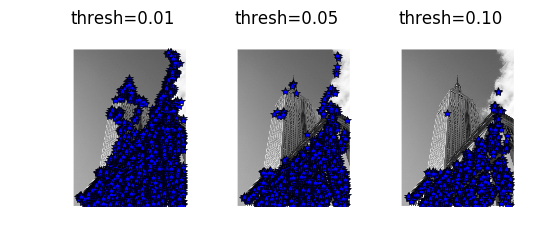

In [2]:
import harris # I saved some harris functions to a file called harris.py
from PIL import Image
from pylab import *
%matplotlib inline
im = array(Image.open('empire.jpg').convert('L'))
harrisim = harris.compute_harris_response(im) 

# There are 3 parameters in detector corners with the harris detector
# 1) the sigma of the response function, currently set at 3 pixels 
# (from the book)
# 2) min_dist, the minimum number of pixels separating corners from the 
    # boundary, currently set a 6 pixels (from the book)
# 3) threshold, the fraction of the maximum value of the response function
# above which you consider something a corner

# Let's plot the harris points using different thresholds
figure()
gray()
for ii,thresh in enumerate([0.01,0.05,0.1]):
    filtered_coords = harris.get_harris_points(harrisim,min_dist=6,
                                               threshold=thresh) 
    subplot(1,3,ii+1)

    imshow(im)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'*') 
    axis('off')
    title('thresh=%.2f' % thresh)

We can then find corresponding points in two images. This will be useful for 3D modeling and for video tracking. In *harris.py* I added 3 functions, *get_descriptors()*, *match()*, and *match_twosided()*. 

*get_descriptors()* gets the pixels values around a list of points in an image. These are called "patches" in the book

*match()* uses a normalized cross-correlation: 
$$ncc(I_1,I_2) = \frac{1}{(n-1)} \sum_{x}\frac{(I_1(x) - \mu_1)}{\sigma_1} \cdot \frac{(I_2(x) - \mu_2)}{\sigma_2} $$ To find corresponding descriptors (patches) between two images

*match_twosided()* makes sure the match is run starting on both images to test for symmetry.

We can test this out with two images taken of the same scene from two different perspectives:

In [3]:
im1 = array(Image.open('data/alcatraz1.jpg').convert('L'))
im2 = array(Image.open('data/alcatraz2.jpg').convert('L'))

wid = 5
harrisim = harris.compute_harris_response(im1,5) 
filtered_coords1 = harris.get_harris_points(harrisim,wid+1) 
d1 = harris.get_descriptors(im1,filtered_coords1,wid) 

harrisim = harris.compute_harris_response(im2,5) 
filtered_coords2 = harris.get_harris_points(harrisim,wid+1) 
d2 = harris.get_descriptors(im2,filtered_coords2,wid)
print 'starting matching'
matches = harris.match_twosided(d1,d2) # This takes a while. up to a few hours.
# I had to leave and come back overnight

starting matching


harris.py:65: RuntimeWarning: invalid value encountered in divide
  d1 = (desc1[i] - mean(desc1[i])) / std(desc1[i])
harris.py:66: RuntimeWarning: invalid value encountered in divide
  d2 = (desc2[j] - mean(desc2[j])) / std(desc2[j])


NameError: global name 'imshow' is not defined

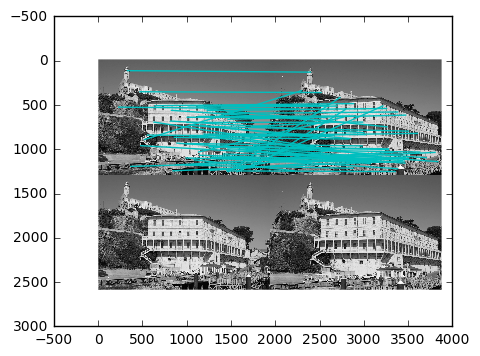

In [18]:
locs1=filtered_coords1
locs2=filtered_coords2
im3 = harris.appendimages(im1,im2) 

im3 = vstack((im3,im3))
imshow(im3)
cols1 = im1.shape[1]
# Plot every 15th match by drawing a line between locations in 
# both images. Plotting every match makes it hard to see the connections
for i in range(1,len(matches),15):
    m = matches[i]
    if m>0: 
        plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'c')
